In [69]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

1) Check out the Jupyter notebook for Chapter 5 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb

What regularization techniques were mentioned in that Jupyter notebook?

There are different weight regularizers available in Keras. The one that are mentioned in Jupyter notebook are: `l1 (Lasso), l2 (Ridge), l1_l2 (Elastic Net)` and `Dropout`.

2) The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

 We now create a new dataset of about 30,000 training images, about 5,000 test images and 5 labels (which are 0, 1, 2, 3, 4) as follows. First, randomly pair up the training images of label 0 with the training images of label 1, to get about 6,000 such pairs. (The actual number may be a little less than 6,000, because the number of images for some label may be less than -- although close to -- 6,000. In this case, just get as many pairs as you can.) Then, for each pair (A,B) where A is an image of label 0 and B is an image of label 1, we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B. (So the new image is a "mixture" of the two original images.) This way we create about 6,000 new "mixture" images for training. In a similar way, we create about 1,000 new "mixture" images for testing. We give all these about 6,000+1,000=7,000 new "mixture" images the new label 0. Then, in the same way, we create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "2" and "3", and give them the new label 1; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "4" and "5", and give them the new label 2; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "6" and "7", and give them the new label 3; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "8" and "9", and give them the new label 4.    

Your task: submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook.

In [70]:
import random
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from tensorflow.keras.datasets import mnist

In [71]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

display(f"Train Images: {train_images.shape}, Labels: {train_labels.shape}")
display(f"Test Images: {test_images.shape}, Labels: {test_labels.shape}")

'Train Images: (60000, 28, 28), Labels: (60000,)'

'Test Images: (10000, 28, 28), Labels: (10000,)'

In [72]:
label_train_images = defaultdict(list)
label_test_images = defaultdict(list)

# Populate the dictionary with lists of images based on their labels
for idx, label in enumerate(train_labels):
    label_train_images[label].append(train_images[idx])
for idx, label in enumerate(test_labels):
    label_test_images[label].append(test_images[idx])

display(f"Length of train set: {len(label_train_images)}")
sum = 0
for i in range(len(label_train_images)):
    display(f"{i}: {len(label_train_images[i])}")
    sum += len(label_train_images[i])
display(f"Sum: {sum}")

display(f"Length of test set: {len(label_test_images)}")
sum = 0
for i in range(len(label_test_images)):
    display(f"{i}: {len(label_test_images[i])}")
    sum += len(label_test_images[i])
display(f"Sum: {sum}")

'Length of train set: 10'

'0: 5923'

'1: 6742'

'2: 5958'

'3: 6131'

'4: 5842'

'5: 5421'

'6: 5918'

'7: 6265'

'8: 5851'

'9: 5949'

'Sum: 60000'

'Length of test set: 10'

'0: 980'

'1: 1135'

'2: 1032'

'3: 1010'

'4: 982'

'5: 892'

'6: 958'

'7: 1028'

'8: 974'

'9: 1009'

'Sum: 10000'

In [73]:
def generate_random_pairs(images, label_a, label_b):
    # Extract images with labels a and b
    images_a = images[label_a]
    images_b = images[label_b]

    # Convert lists to numpy arrays if they aren't already
    images_a = np.array(images_a)
    images_b = np.array(images_b)

    # Shuffle the images
    np.random.shuffle(images_a)
    np.random.shuffle(images_b)

    # Determine the number of pairs
    num_pairs = min(len(images_a), len(images_b))

    # Create pairs
    pairs = [(images_a[i], images_b[i]) for i in range(num_pairs)]

    return pairs


def generate_mixed_images(pairs):
    mixed_images = []
    for pair in pairs:
        # Unpack the pair
        image_a, image_b = pair

        # Compute the average image
        mixed_image = (image_a + image_b) // 2  # Element-wise average, rounding down

        mixed_images.append(mixed_image)

    return mixed_images


def generate_mixed_dataset(label_images, pairs_of_labels):
    mixed_datasets = {}
    label = 0
    for label_a, label_b in pairs_of_labels:
        pairs = generate_random_pairs(label_images, label_a, label_b)
        mixed_images = generate_mixed_images(pairs)
        mixed_datasets[label] = np.array(mixed_images)
        print(
            f"Generated {len(mixed_images)} mixed images for labels {label_a} and {label_b} with {label} label"
        )
        label += 1
    return mixed_datasets

In [74]:
# Define pairs of labels for which to generate mixed datasets
pairs_of_labels = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

# Generate mixed datasets for training and testing
mixed_train_datasets = generate_mixed_dataset(label_train_images, pairs_of_labels)
mixed_test_datasets = generate_mixed_dataset(label_test_images, pairs_of_labels)

Generated 5923 mixed images for labels 0 and 1 with 0 label
Generated 5958 mixed images for labels 2 and 3 with 1 label
Generated 5421 mixed images for labels 4 and 5 with 2 label
Generated 5918 mixed images for labels 6 and 7 with 3 label
Generated 5851 mixed images for labels 8 and 9 with 4 label
Generated 980 mixed images for labels 0 and 1 with 0 label
Generated 1010 mixed images for labels 2 and 3 with 1 label
Generated 892 mixed images for labels 4 and 5 with 2 label
Generated 958 mixed images for labels 6 and 7 with 3 label
Generated 974 mixed images for labels 8 and 9 with 4 label


In [75]:
def plot_images_by_label(dataset, labels_to_plot, dataset_name, images_per_label=2):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(labels_to_plot):
        for j in range(images_per_label):
            random_index = random.randint(0, len(dataset[label]) - 1)
            plt.subplot(
                len(labels_to_plot), images_per_label, i * images_per_label + j + 1
            )
            plt.imshow(dataset[i][random_index], cmap="gray")
            plt.title(f"{dataset_name} Dataset\nLabel: {label}")
            plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_dataset.svg", dpi=300, format="svg")
    plt.show()

In [76]:
labels_to_plot = [0, 1, 2, 3, 4]

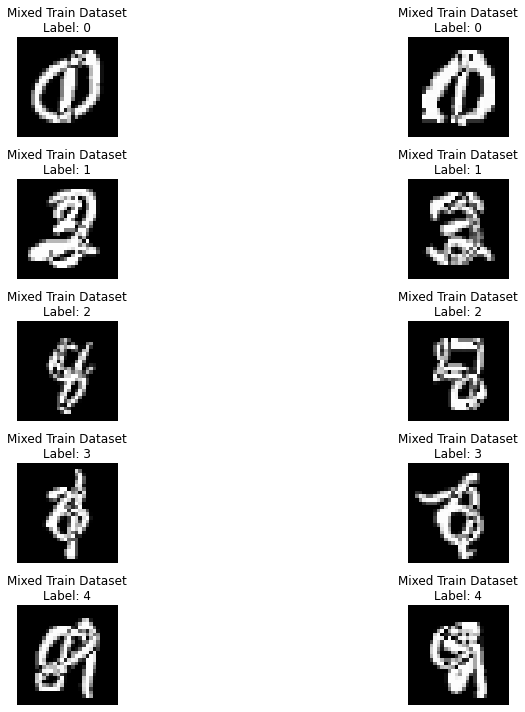

In [77]:
# Plot images for training dataset
plot_images_by_label(mixed_train_datasets, labels_to_plot, "Mixed Train")

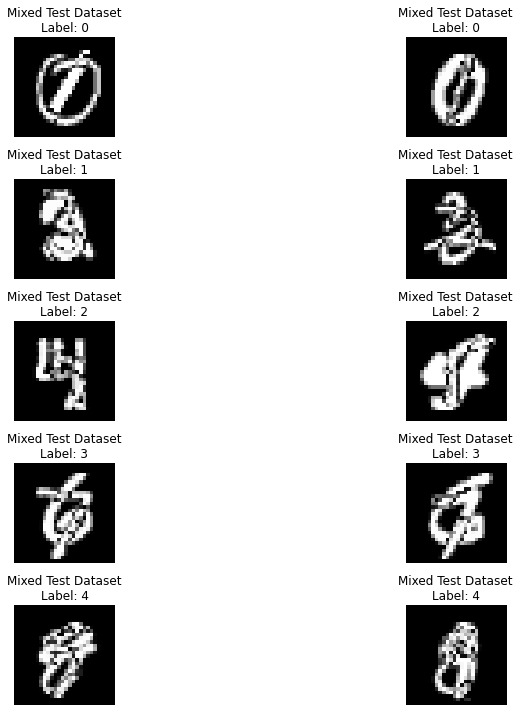

In [78]:
# Plot images for test dataset
plot_images_by_label(mixed_test_datasets, labels_to_plot, "Mixed Test")

3) Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout).

Your task: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.)

In [79]:
from sklearn import utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint


def get_model0():
    model = Sequential(
        [
            Flatten(input_shape=(28, 28)),
            Dense(512, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
            layers.Dropout(0.5),
            Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-5)),
            layers.Dropout(0.2),
            Dense(len(label_encoder.classes_), activation="softmax"),
        ]
    )
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def get_model1():
    model = Sequential(
        [
            Flatten(input_shape=(28, 28)),
            Dense(512, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
            layers.Dropout(0.5),
            Dense(256, activation="relu", kernel_regularizer=regularizers.l1(1e-5)),
            layers.Dropout(0.2),
            Dense(len(label_encoder.classes_), activation="softmax"),
        ]
    )
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def get_model2():
    model = Sequential(
        [
            Flatten(input_shape=(28, 28)),
            Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
            layers.Dropout(0.5),
            Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-5)),
            layers.Dropout(0.2),
            Dense(len(label_encoder.classes_), activation="softmax"),
        ]
    )
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def get_model3():
    model = Sequential(
        [
            Flatten(input_shape=(28, 28)),
            Dense(512, activation="relu"),
            Dense(256, activation="relu"),
            Dense(len(label_encoder.classes_), activation="softmax"),
        ]
    )
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


train_images = []
train_labels = []

for label, images in mixed_train_datasets.items():
    for image in images:
        train_images.append(image)
        train_labels.append(label)

train_images, train_labels = utils.shuffle(train_images, train_labels)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Ensure train_labels are correctly encoded
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)

# Display the shapes and lengths of the datasets
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Length of train_labels:", len(train_labels))

test_images = []
test_labels = []

for label, images in mixed_test_datasets.items():
    for image in images:
        test_images.append(image)
        test_labels.append(label)

test_images, test_labels = utils.shuffle(test_images, test_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Ensure train_labels are correctly encoded
label_encoder = LabelEncoder()
test_labels = label_encoder.fit_transform(test_labels)

# Display the shapes and lengths of the datasets
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)
print("Length of test_labels:", len(test_labels))

filepath0 = "hw3_best_model0.h5"
filepath1 = "hw3_best_model1.h5"
filepath2 = "hw3_best_model2.h5"
filepath3 = "hw3_best_model3.h5"

checkpoint0 = ModelCheckpoint(
    filepath0, monitor="val_accuracy", verbose=0, save_best_only=True, mode="max"
)
checkpoint1 = ModelCheckpoint(
    filepath1, monitor="val_accuracy", verbose=0, save_best_only=True, mode="max"
)
checkpoint2 = ModelCheckpoint(
    filepath2, monitor="val_accuracy", verbose=0, save_best_only=True, mode="max"
)
checkpoint3 = ModelCheckpoint(
    filepath3, monitor="val_accuracy", verbose=0, save_best_only=True, mode="max"
)


model0 = get_model0()
history0 = model0.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint0],
)

model1 = get_model1()
history1 = model1.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint1],
)

model2 = get_model2()
history2 = model2.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint2],
)

model3 = get_model3()
history3 = model3.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint3],
)

Shape of train_images: (29071, 28, 28)
Shape of train_labels: (29071,)
Length of train_labels: 29071
Shape of test_images: (4814, 28, 28)
Shape of test_labels: (4814,)
Length of test_labels: 4814
Epoch 1/20
182/182 [==============================] - 1s 5ms/step - loss: 22.4523 - accuracy: 0.6425 - val_loss: 1.4263 - val_accuracy: 0.8595
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 1.7707 - accuracy: 0.8332 - val_loss: 0.7525 - val_accuracy: 0.8937
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 1.0694 - accuracy: 0.8510 - val_loss: 0.5754 - val_accuracy: 0.9159
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 0.8034 - accuracy: 0.8703 - val_loss: 0.5236 - val_accuracy: 0.9324
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 0.6506 - accuracy: 0.8940 - val_loss: 0.5105 - val_accuracy: 0.9176
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 0.6010 - accuracy: 

182/182 [==============================] - 1s 3ms/step - loss: 0.1930 - accuracy: 0.9521 - val_loss: 0.1574 - val_accuracy: 0.9629
Epoch 18/20
182/182 [==============================] - 1s 3ms/step - loss: 0.1966 - accuracy: 0.9546 - val_loss: 0.1766 - val_accuracy: 0.9582
Epoch 19/20
182/182 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9566 - val_loss: 0.1819 - val_accuracy: 0.9625
Epoch 20/20
182/182 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9580 - val_loss: 0.1743 - val_accuracy: 0.9617
Epoch 1/20
182/182 [==============================] - 1s 4ms/step - loss: 19.8520 - accuracy: 0.7084 - val_loss: 0.6155 - val_accuracy: 0.8619
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.8970 - val_loss: 0.5420 - val_accuracy: 0.8893
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 0.3278 - accuracy: 0.9181 - val_loss: 0.3996 - val_accuracy: 0.8958
Epoch 4/20
18

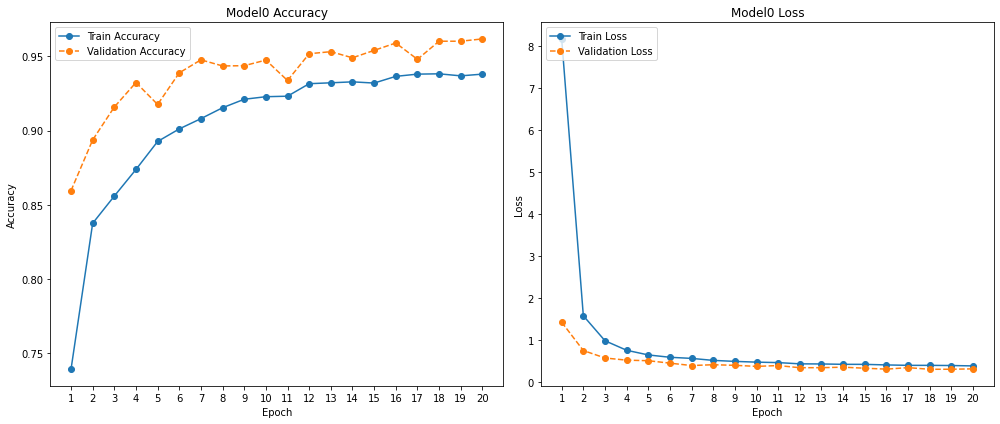

In [80]:
# Define the epochs array
epochs = np.arange(1, len(history0.history["accuracy"]) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot (left)
ax1.plot(epochs, history0.history["accuracy"], marker="o", label="Train Accuracy")
ax1.plot(
    epochs,
    history0.history["val_accuracy"],
    marker="o",
    linestyle="dashed",
    label="Validation Accuracy",
)
ax1.set_title("Model0 Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(epochs)
ax1.legend(loc="upper left")

# Plotting loss on the second subplot (right)
ax2.plot(epochs, history0.history["loss"], marker="o", label="Train Loss")
ax2.plot(
    epochs,
    history0.history["val_loss"],
    marker="o",
    linestyle="dashed",
    label="Validation Loss",
)
ax2.set_title("Model0 Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(epochs)
ax2.legend(loc="upper left")

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("model0_history.svg", dpi=300, format="svg")

plt.show()

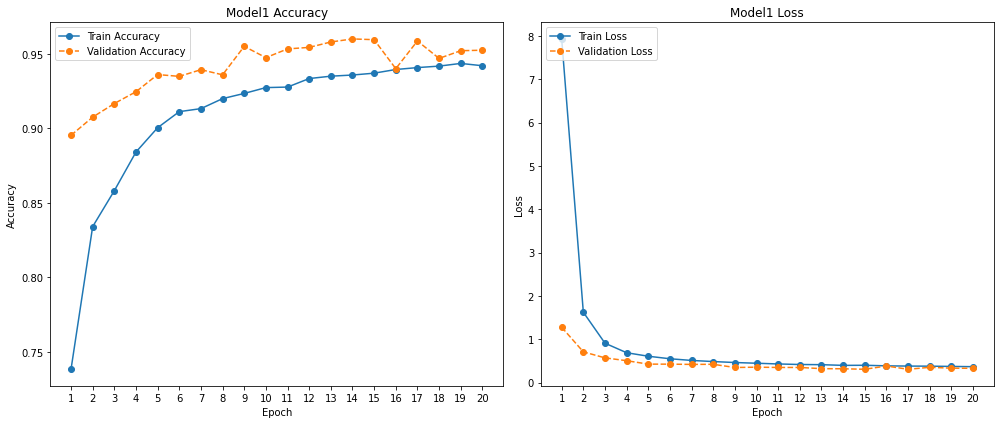

In [81]:
# Define the epochs array
epochs = np.arange(1, len(history1.history["accuracy"]) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot (left)
ax1.plot(epochs, history1.history["accuracy"], marker="o", label="Train Accuracy")
ax1.plot(
    epochs,
    history1.history["val_accuracy"],
    marker="o",
    linestyle="dashed",
    label="Validation Accuracy",
)
ax1.set_title("Model1 Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(epochs)
ax1.legend(loc="upper left")

# Plotting loss on the second subplot (right)
ax2.plot(epochs, history1.history["loss"], marker="o", label="Train Loss")
ax2.plot(
    epochs,
    history1.history["val_loss"],
    marker="o",
    linestyle="dashed",
    label="Validation Loss",
)
ax2.set_title("Model1 Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(epochs)
ax2.legend(loc="upper left")

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("model1_history.svg", dpi=300, format="svg")

plt.show()

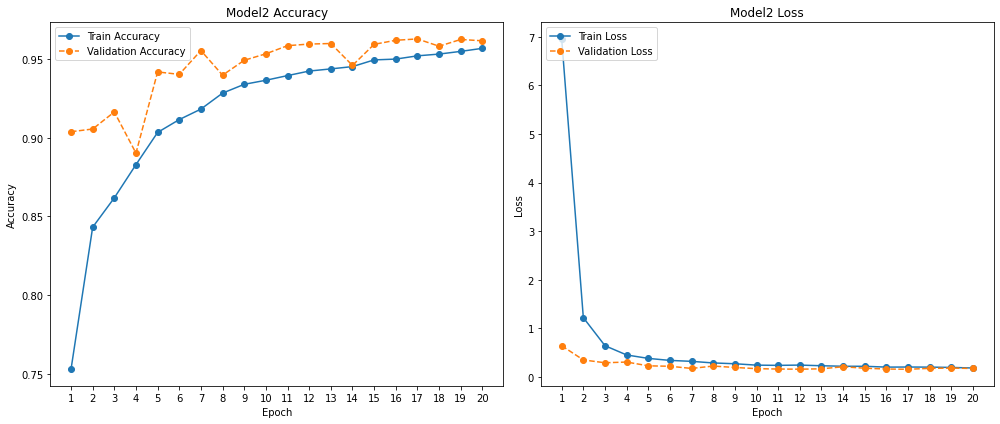

In [82]:
# Define the epochs array
epochs = np.arange(1, len(history2.history["accuracy"]) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot (left)
ax1.plot(epochs, history2.history["accuracy"], marker="o", label="Train Accuracy")
ax1.plot(
    epochs,
    history2.history["val_accuracy"],
    marker="o",
    linestyle="dashed",
    label="Validation Accuracy",
)
ax1.set_title("Model2 Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(epochs)
ax1.legend(loc="upper left")

# Plotting loss on the second subplot (right)
ax2.plot(epochs, history2.history["loss"], marker="o", label="Train Loss")
ax2.plot(
    epochs,
    history2.history["val_loss"],
    marker="o",
    linestyle="dashed",
    label="Validation Loss",
)
ax2.set_title("Model2 Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(epochs)
ax2.legend(loc="upper left")

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("model2_history.svg", dpi=300, format="svg")

plt.show()

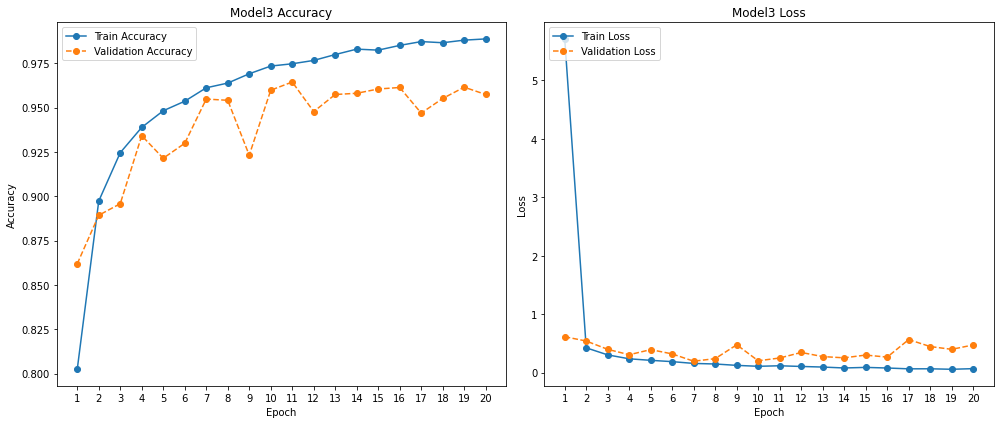

In [83]:
# Define the epochs array
epochs = np.arange(1, len(history3.history["accuracy"]) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracy on the first subplot (left)
ax1.plot(epochs, history3.history["accuracy"], marker="o", label="Train Accuracy")
ax1.plot(
    epochs,
    history3.history["val_accuracy"],
    marker="o",
    linestyle="dashed",
    label="Validation Accuracy",
)
ax1.set_title("Model3 Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(epochs)
ax1.legend(loc="upper left")

# Plotting loss on the second subplot (right)
ax2.plot(epochs, history3.history["loss"], marker="o", label="Train Loss")
ax2.plot(
    epochs,
    history3.history["val_loss"],
    marker="o",
    linestyle="dashed",
    label="Validation Loss",
)
ax2.set_title("Model3 Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(epochs)
ax2.legend(loc="upper left")

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("model3_history.svg", dpi=300, format="svg")

plt.show()

In [84]:
best_model0 = load_model(filepath0)
best_model1 = load_model(filepath1)
best_model2 = load_model(filepath2)
best_model3 = load_model(filepath3)


display(best_model0.evaluate(test_images, test_labels))
display(best_model1.evaluate(test_images, test_labels))
display(best_model2.evaluate(test_images, test_labels))
display(best_model3.evaluate(test_images, test_labels))

151/151 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.9551


[0.33160942792892456, 0.9551308751106262]

151/151 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.9481


[0.3576975464820862, 0.9480681419372559]

151/151 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9601


[0.17729610204696655, 0.9601163268089294]

151/151 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9582


[0.28354308009147644, 0.9582467675209045]

In this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help?

- Model0: with L1 and L2 regularizations and Dropout
- Model1: with L1 regularizations and Dropout
- Model2: with L2 regularizations and Dropout
- Model3: no regularizations

The model did not exhibit any signs of underfitting, but there were clear indications of overfitting (as observed in model3). To address this, I applied L1 and L2 regularization along with Dropout techniques, both of which effectively reduced the overfitting. A crucial insight was that the data needs to be shuffled before training. Without shuffling, the model attains high accuracy on the training set but significantly lower accuracy on the validation set. This discrepancy underscores the importance of proper data preparation to ensure more accurate and reliable validation outcomes.